In [1]:
import numpy as np
import matplotlib.pyplot as plt # Ya lo importamos para cuando lo uses

#Esta función me devuelve una matriz de frecuencias y también me da su diccionario, que es a qué letra corresponde cada columna
def calcular_matriz_frecuencias(base_de_datos):
    #Primero definimos las dimensiones de la Matriz
    longitud_secuencia = len(base_de_datos[0]) 
    
    # Lista ordenada de aminoácidos (Tu "Clave" para saber qué es cada fila)
    orden_aa = "ACDEFGHIKLMNPQRSTVWY-"
    n_aminoacidos = len(orden_aa) # 21
    
    # 2. Creamos el "Mapa Traductor" (Diccionario auxiliar)
    # Esto convierte letra -> número de fila. 
    # Ejemplo: {'A': 0, 'C': 1, ...}
    # Es vital para no tener que buscar la posición en la lista en cada vuelta del bucle
    aa_a_indice = {letra: i for i, letra in enumerate(orden_aa)}
    
    # Dimensiones: (21 filas, 298 columnas)
    matriz = np.zeros((n_aminoacidos, longitud_secuencia), dtype=int)
    for secuencia in range(len(base_de_datos)):
        for letra in range(len(base_de_datos[secuencia])):
            aminoácido=aa_a_indice[base_de_datos[secuencia][letra]]
            matriz[aminoácido][letra]+=1
   
    return matriz, orden_aa

def cargar_secuencias(nombre_archivo):
    lista_secuencias = [] # Aquí guardaremos todo ("base de datos")

    with open(nombre_archivo, 'r') as archivo:
        # Bucle: 'linea' toma el valor de cada fila, una a una
        for linea in archivo:
            # 1. Limpiamos el salto de línea (\n) del final
            secuencia_limpia = linea.strip()
            lista_secuencias.append(secuencia_limpia)

    return lista_secuencias





#Con esta función contamos la longitud de las secuencias y las comparamos. 
#El input es una lista de secuencias y el output es una lista con las posiciones de las secuencias de diferente longitud
def contar_secuencias(base_de_datos):
    longitud0=len(base_de_datos[0]) #Esta es mi longitud de referencia
    indices_con_error=[]
    
    for sequencia in range(len(base_de_datos)): #Con este bucle sacamos los índices de las secuencias con distinta longitud
        longitud=len(base_de_datos[sequencia])
        if longitud!=longitud0:
            indices_con_error.append(sequencia)

    if indices_con_error!=[]:
        print("Hay un error en los siguientes índices: ")
        print(indices_con_error)
    else:
        print("¡Todas las secuencias tienen la misma longitud!") 
    return(indices_con_error, longitud0)

#Ahora voy a hacer un código que me detecte en cada secuencia si tiene alguna letra que no corresponde.
#Estas son: B, J, X, Z, U, O
#Esta función lo que hace es sacar las posiciones de las secuencias que tienen un error de las letras seleccionadas
def revisar_fallos(base_de_datos):
    indices_con_error_letra = []
    # Definimos el conjunto de letras prohibidas una sola vez
    letras_prohibidas = "BJXZUO" 
    
    for i in range(len(base_de_datos)):
        secuencia_actual = base_de_datos[i]
        
        # Iteramos sobre cada letra de la secuencia actual
        for letra in secuencia_actual:
            # USAMOS 'IN': Verificamos pertenencia al conjunto prohibido
            if letra in letras_prohibidas:
                indices_con_error_letra.append(i)
                #Si un índice aparece varias veces, significará que hay varios fallos
                
    return indices_con_error_letra

def secuencias_válidas(nombre_archivo):
    
    datos=cargar_secuencias(nombre_archivo)

    indices_l, l = contar_secuencias(datos)
    if indices_l==[]:
        print("La longitud de las secuencias es", l)

    indices_letra = revisar_fallos(datos)
    if indices_letra!=[]:
        print("Hay un error en los siguientes índices: ")
        print(indices_con_error)
    else:
        print("¡Todas las secuencias tienen los carácteres correctos!") 
 
    
    

In [6]:
mis_datos = cargar_secuencias(r'C:\Users\tester\Desktop\2º Fismat\Biofísica\colaboracion_alumni\seqs\testing_human.seqs')
print(len(mis_datos))
secuencias_válidas(r'C:\Users\tester\Desktop\2º Fismat\Biofísica\colaboracion_alumni\seqs\testing_human.seqs')

1388
¡Todas las secuencias tienen la misma longitud!
La longitud de las secuencias es 298
¡Todas las secuencias tienen los carácteres correctos!


In [7]:
frecuencias, clave = calcular_matriz_frecuencias(mis_datos)
print(len(frecuencias[1]))
frecuencias[0]

298


array([   0,    3,    0,    0,    1,    1,    3,    0,    6,  412,   18,
         10,   12,    1,    4,    5,  198,    8,    0,    2,    0,   11,
          1,  576,  883,    1,    8,    0,   26,   15,    1,   14,   20,
          7,    1,    0,    0,    4,   29,  314,    0,   32,    0,    8,
          0,    0,  934,   17,    3,    2,   42,    0,    1,    0,    3,
        322,   87,    1,    4,   71,   15,   19,    0,    1,   19,   46,
         36,  119,   16,    0,  848,   54,   19,    4,    8,    3,    0,
         27,   28,    1,    5,  254,    1,   11,  241,   43,    2,   16,
        349,    1,    0,    2,    0,    5,    4,    4,    3,  723,  255,
          0,   13, 1325,    1,    0,    0,    0, 1205,   14,  101,   60,
         58,   70,   56,   50,   18,   19,   34,    3,    1,    0,    0,
          0,    0,    0,    0,    1,    0,    3,   27,   17,   24,   25,
         48,   40,  200,   17,   40,   21,    0,    2,    2,    0,   15,
          6,    2,    6,    0,    1,    0,    0,   

In [14]:
from coloring_elbueno import coloring_function

colores = coloring_function (clave)

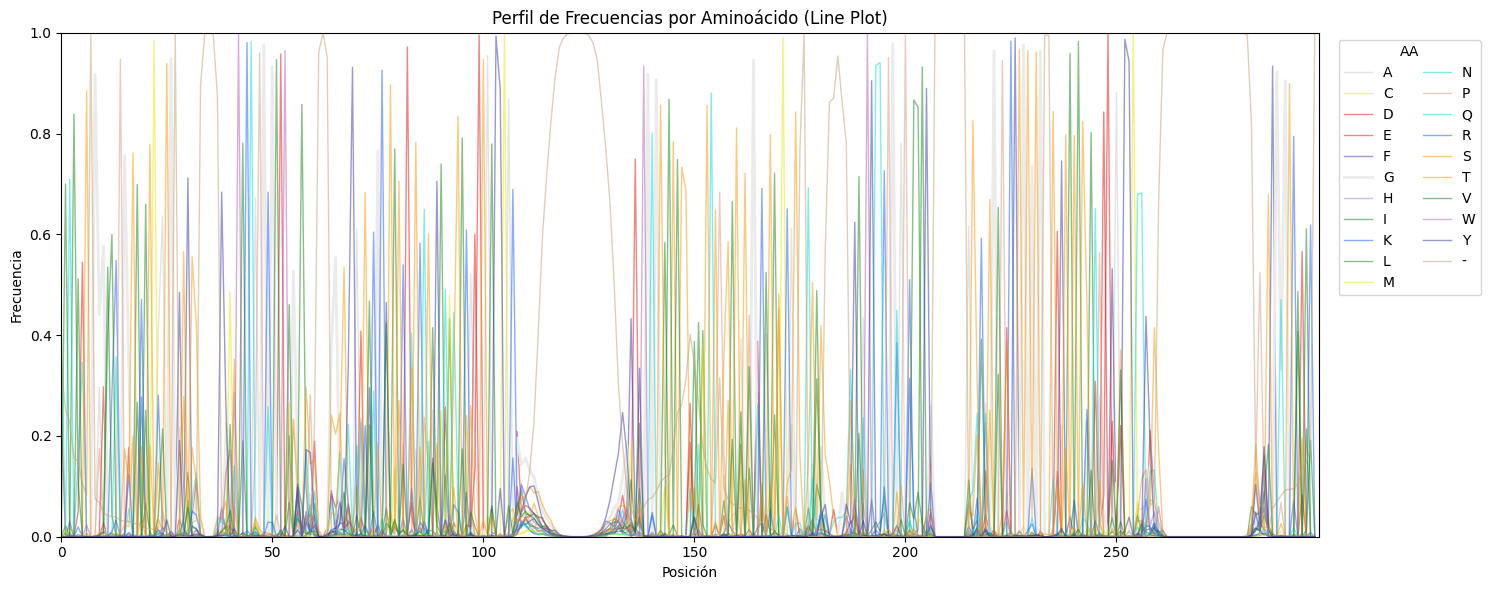

In [ ]:
# --- Graficado con LÍNEAS ---
plt.figure(figsize=(15, 6))

x = np.arange(frecuencias.shape[1])


# En lugar de barras, usamos plot()
for i, aa in enumerate(clave):
    y_valores = frecuencias[i, :]/len(mis_datos)
    
    if aa == 'G' or aa == 'A':        #Como el G es un gris medio claro, haciendo esto nos aseguramos de que se vea más
        alpha_ = 1.0
        grosor_ = 2.0

    else:
        alpha_ = 0.5
        grosor_ = 1.0
    # linewidth=1.0 hace la línea fina y elegante
    # alpha=0.8 le da un toque de transparencia para ver si hay solapamientos
    plt.plot(x, y_valores, label=aa, color=colores[i], linewidth=grosor_, alpha=alpha_)

plt.title('Perfil de Frecuencias por Aminoácido (Line Plot)')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.xlim(0, frecuencias.shape[1])
plt.ylim(0, 1) # La frecuencia va de 0 a 1

# Leyenda fuera
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="AA", ncol=2)
plt.tight_layout()

#plt.savefig('grafico_lineas_frecuencias.png')

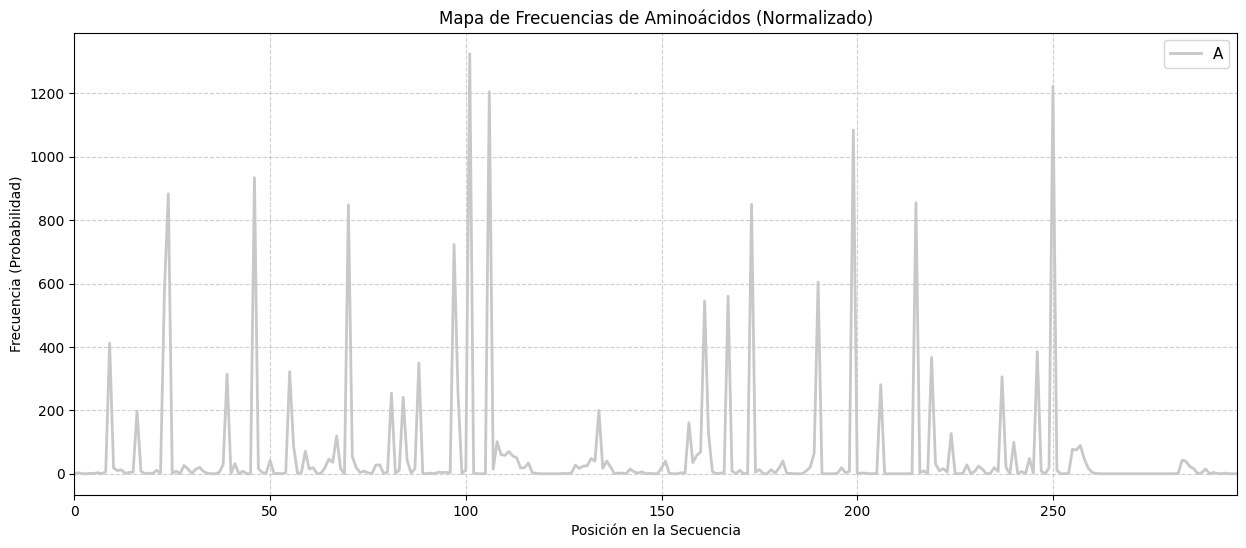

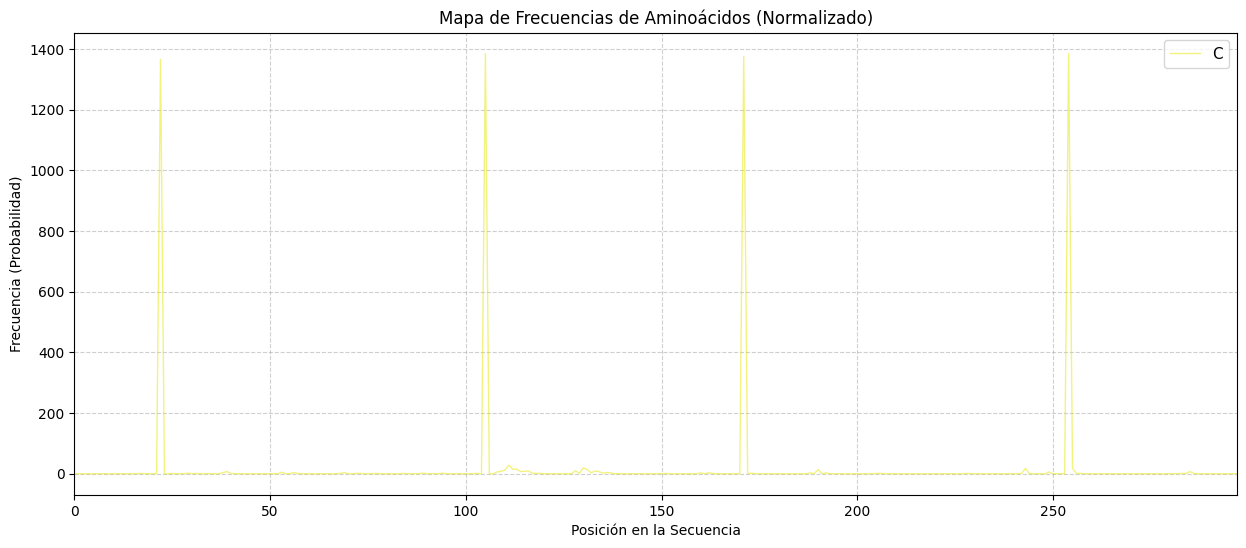

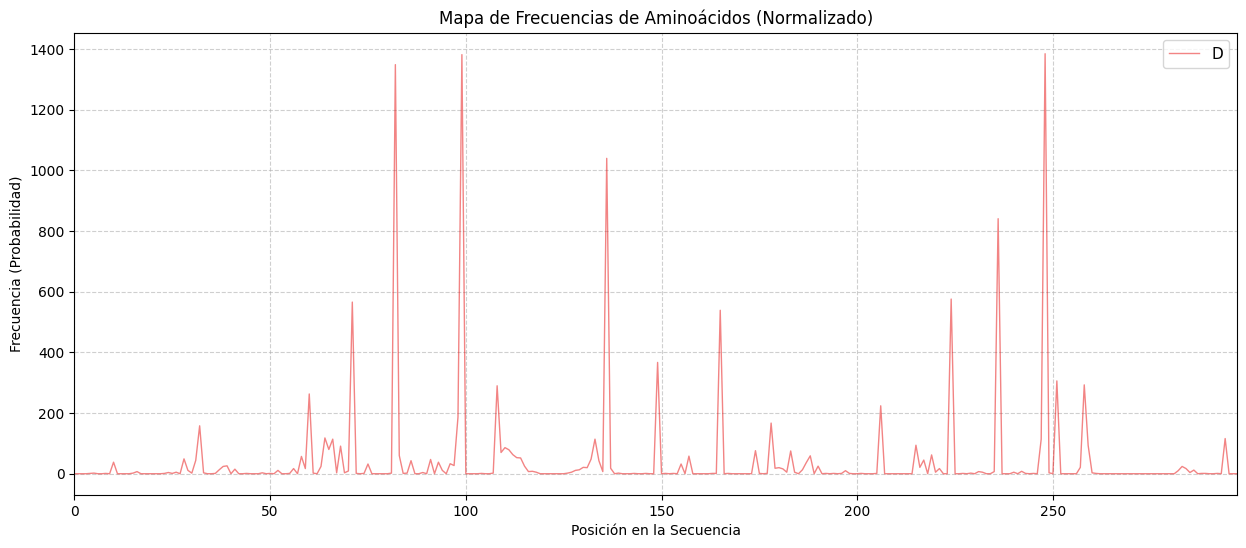

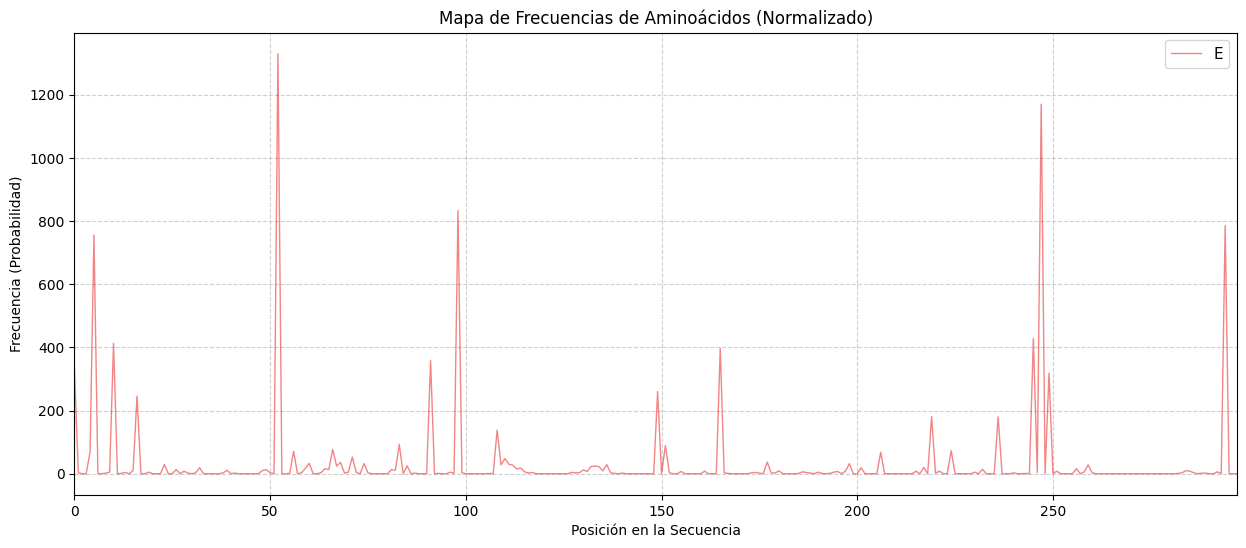

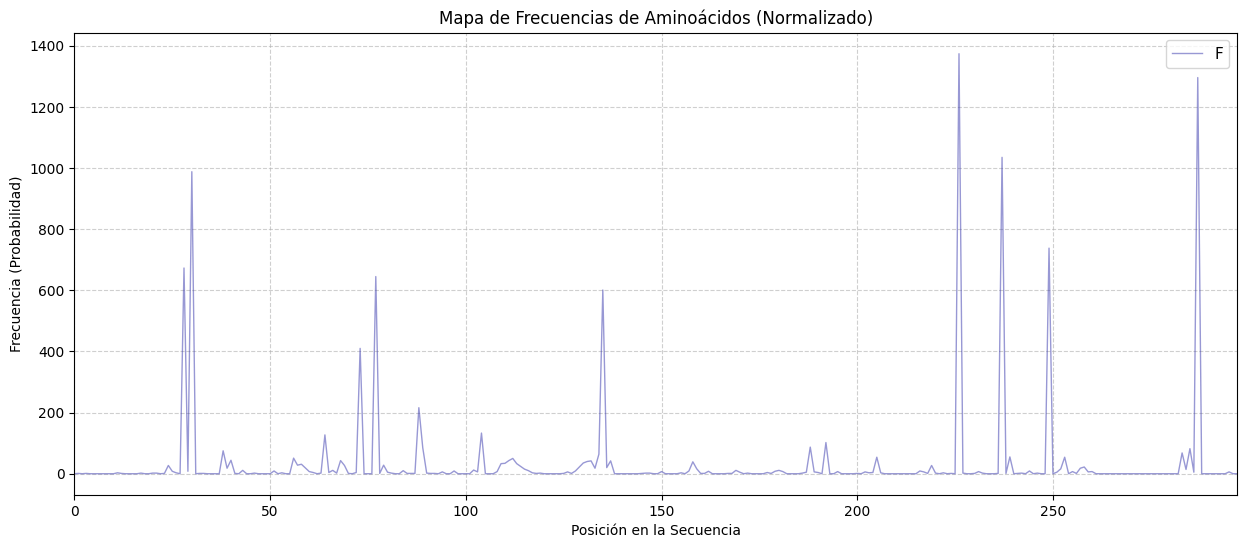

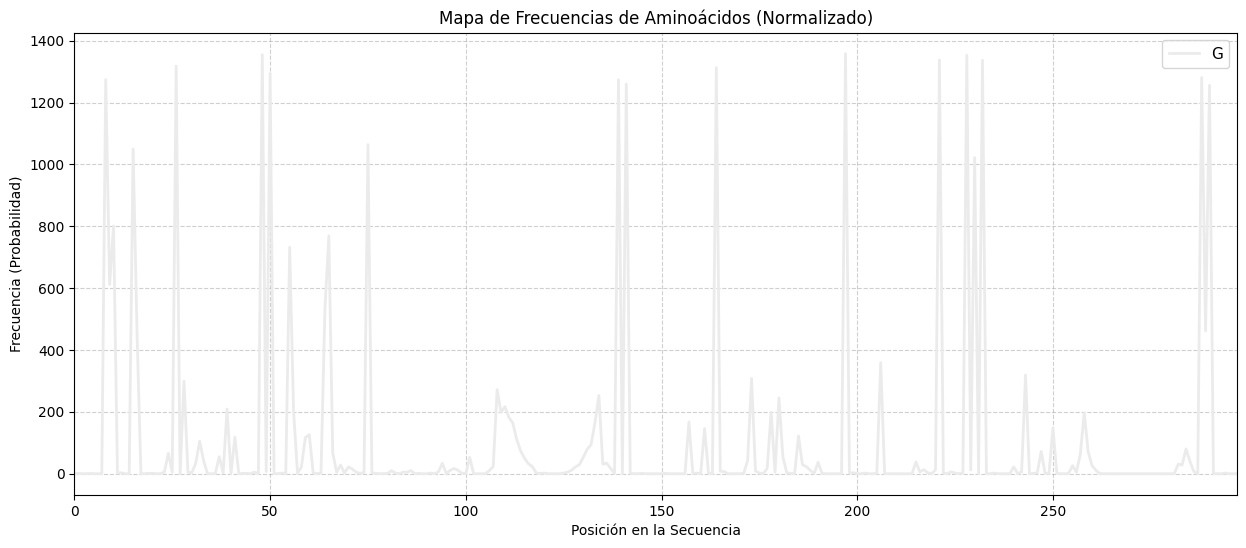

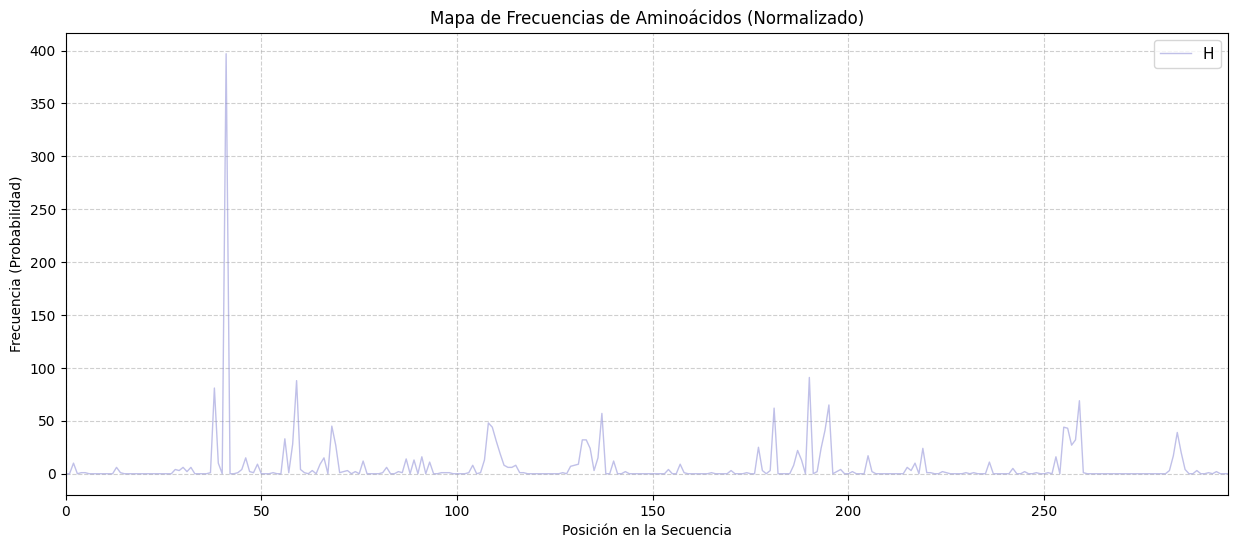

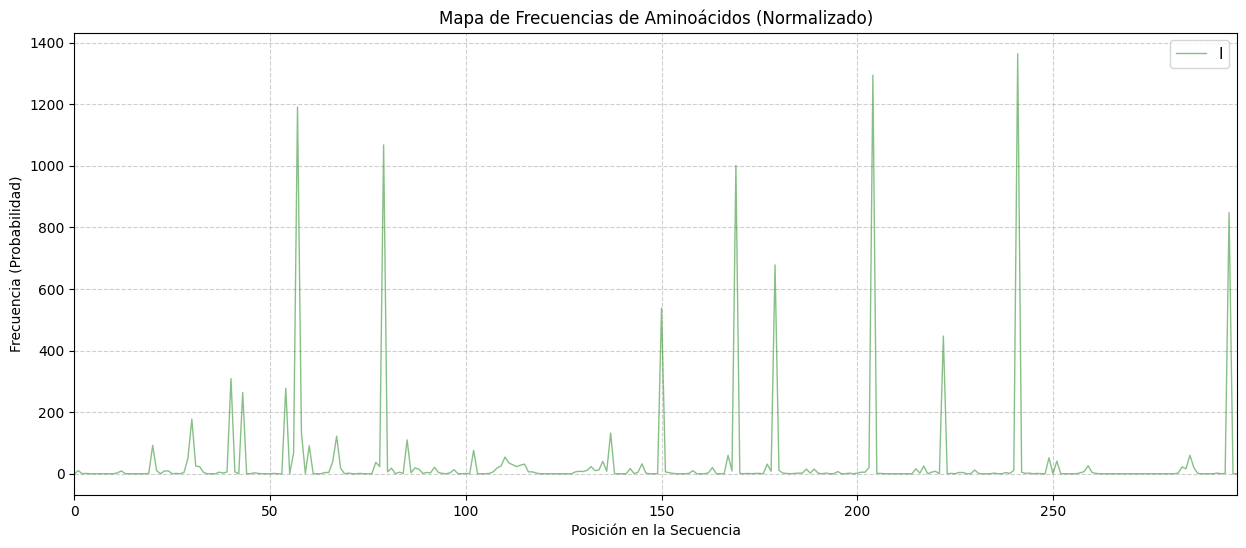

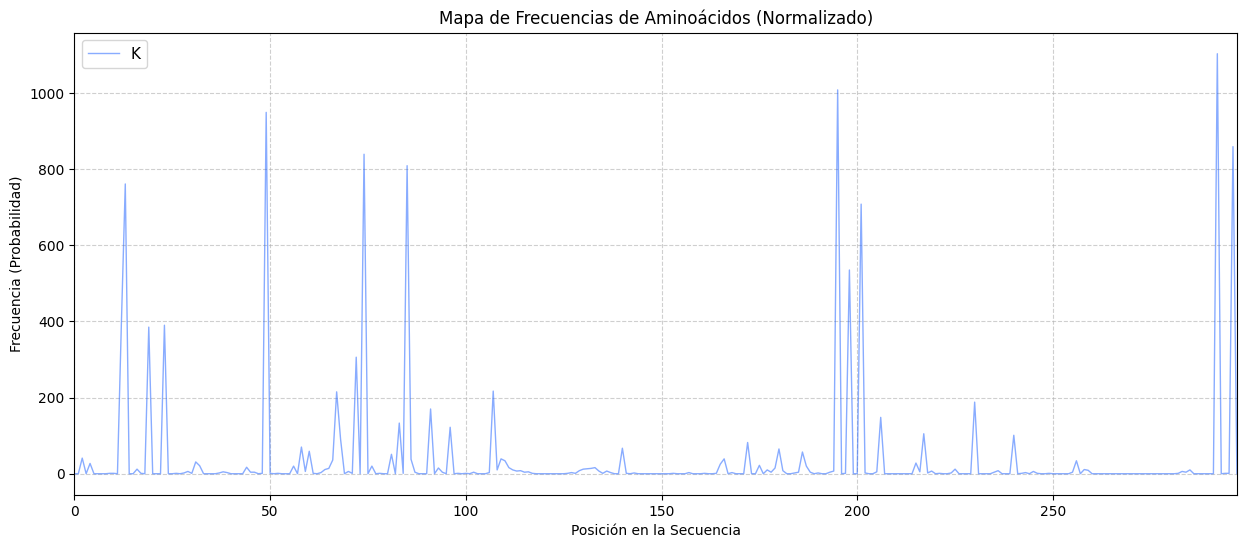

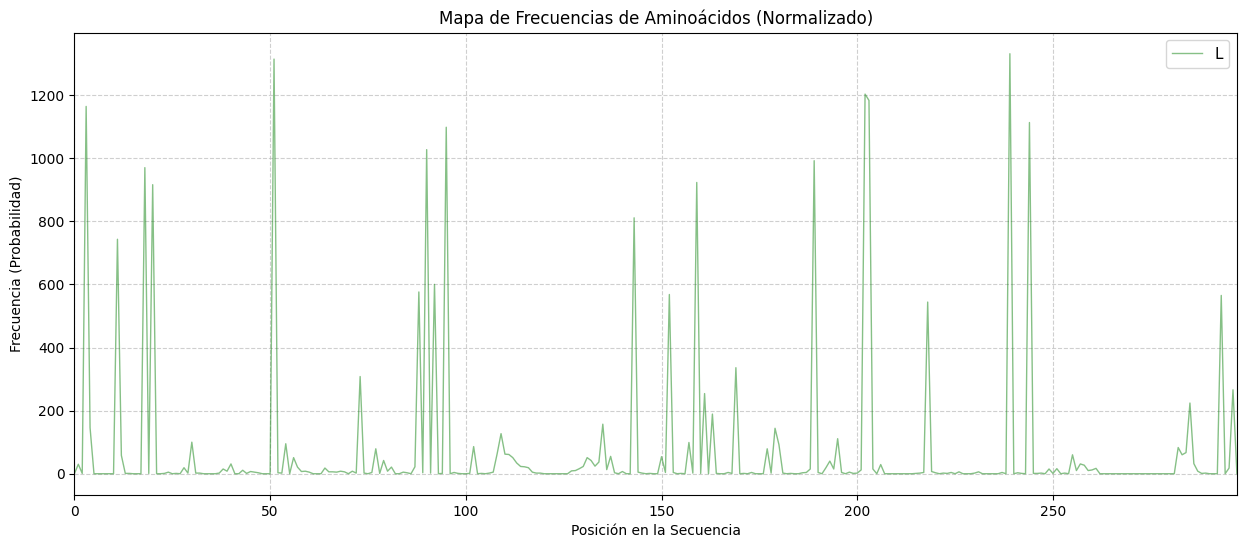

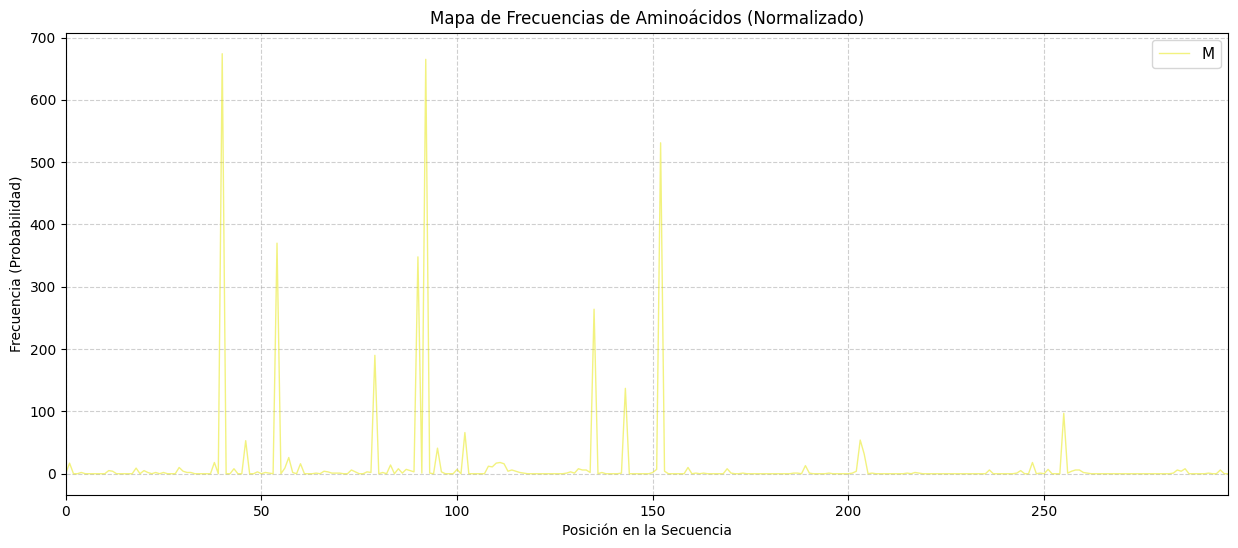

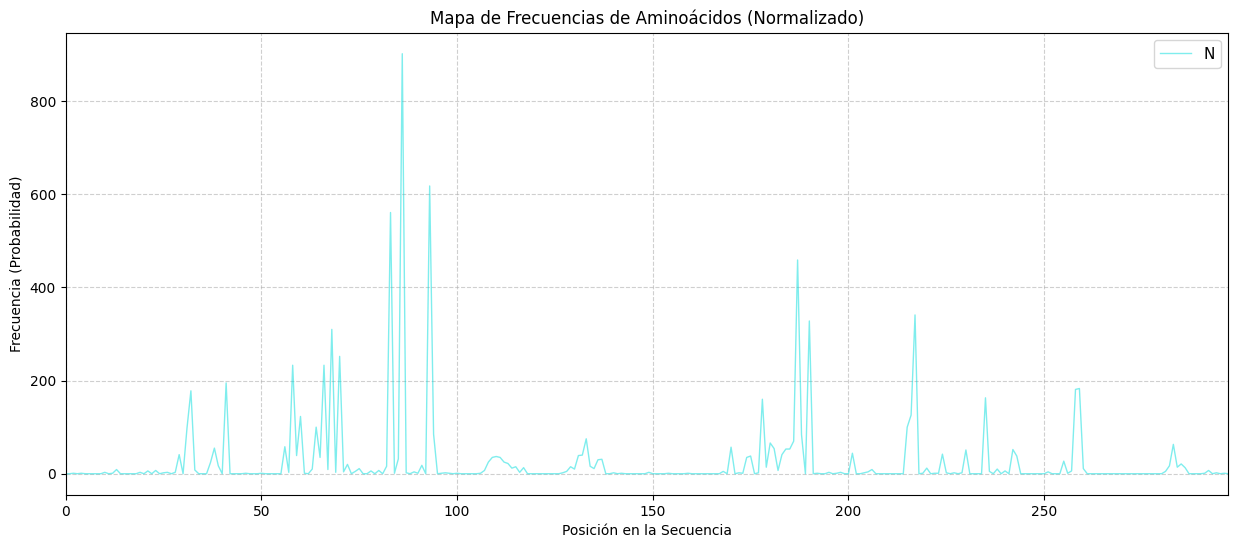

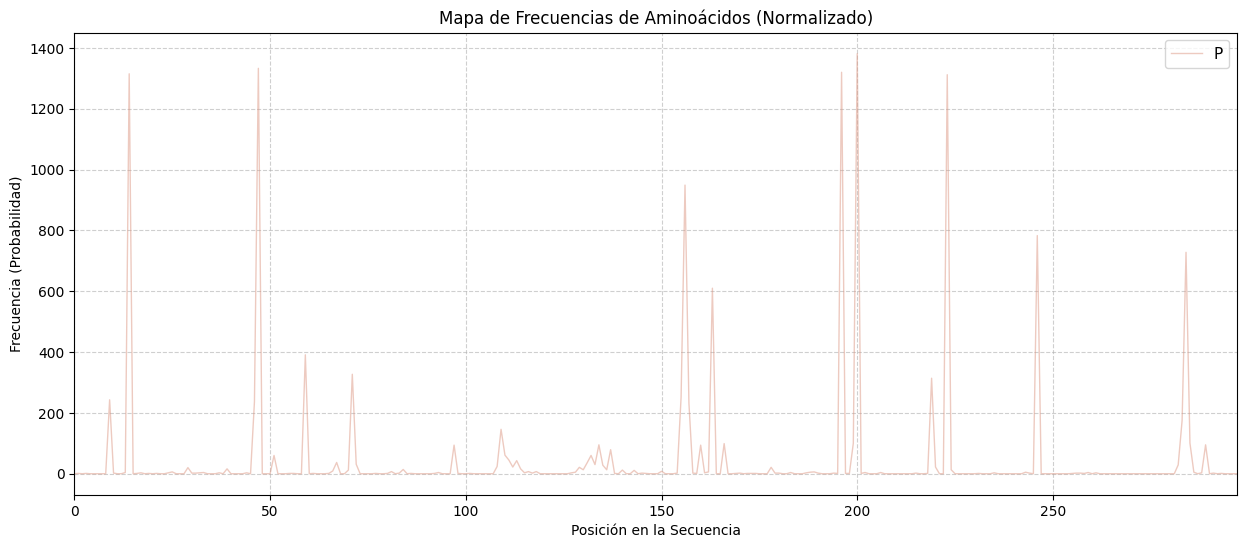

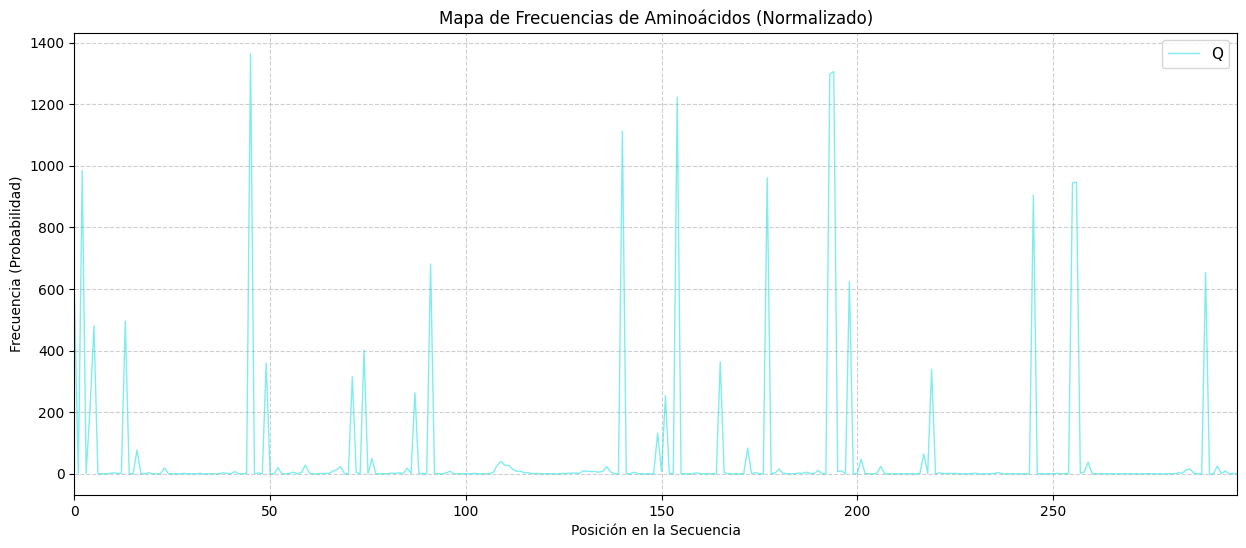

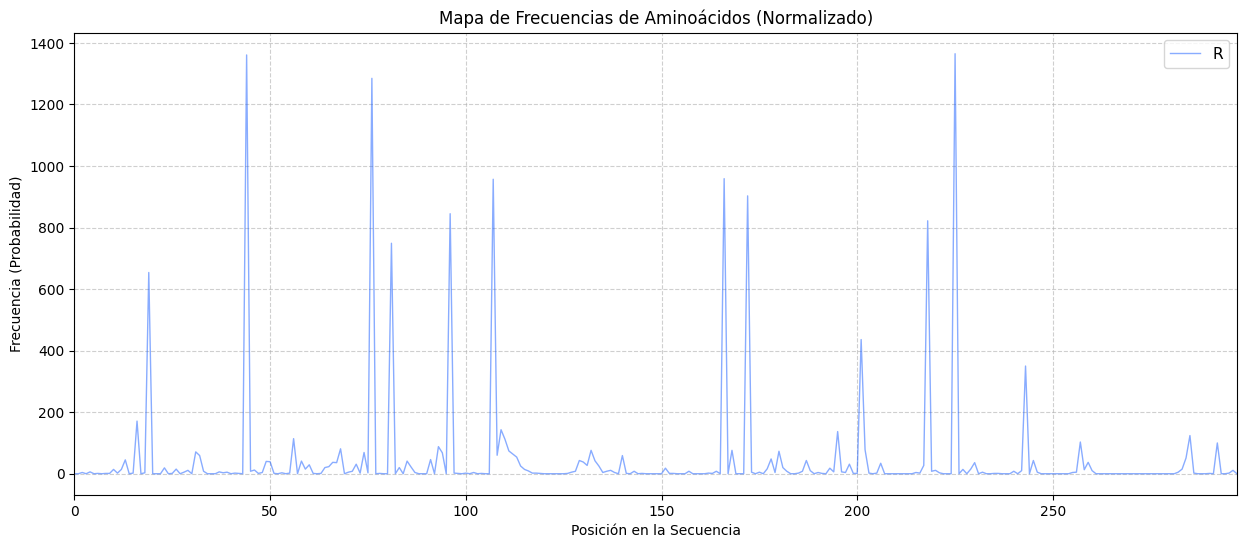

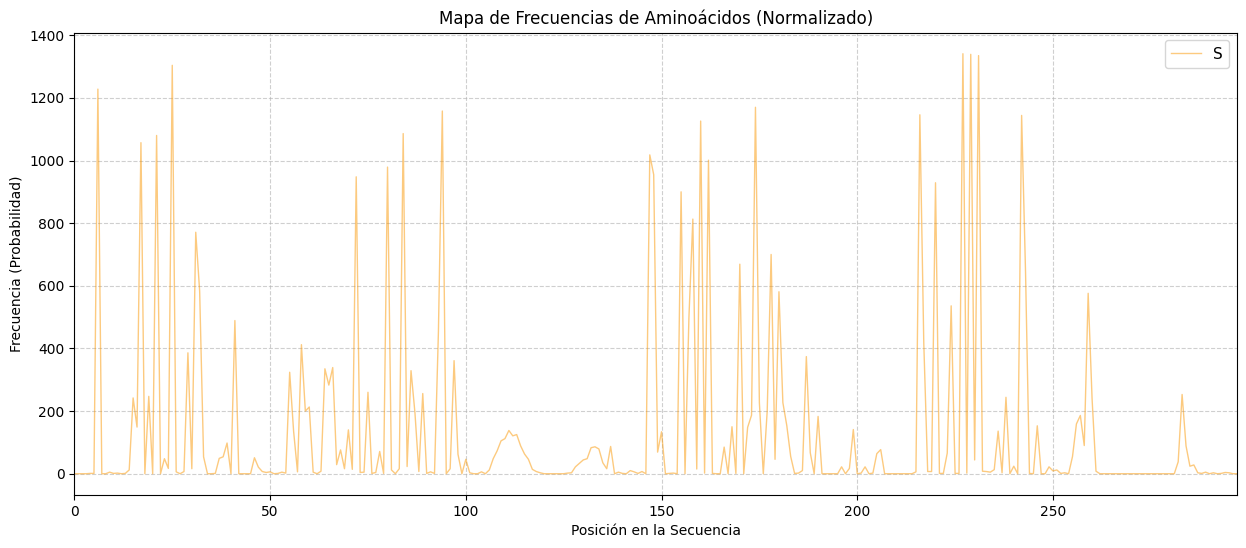

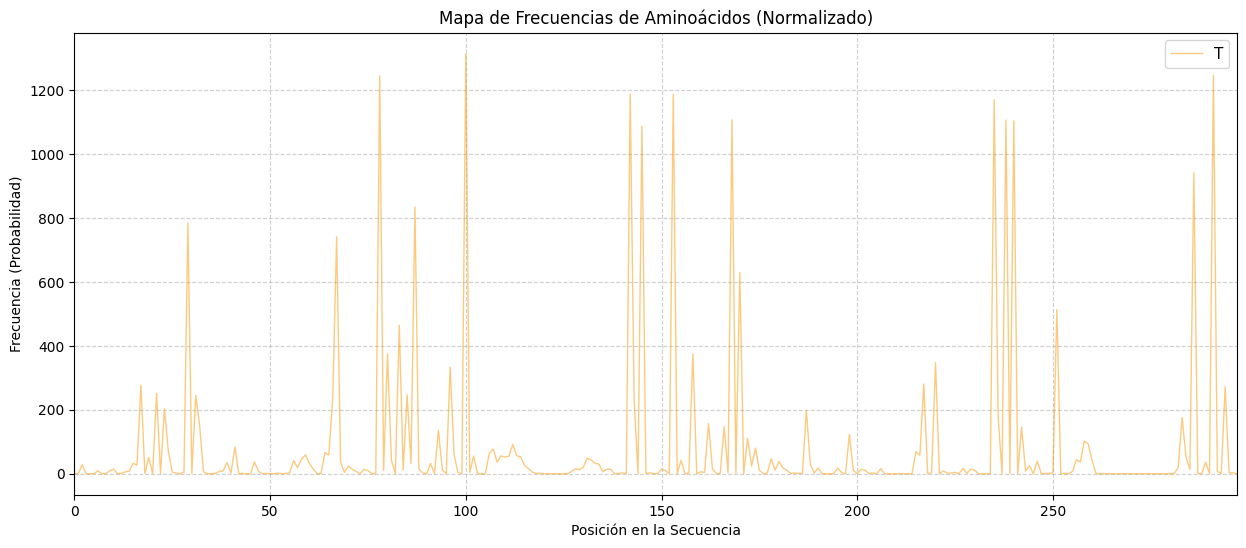

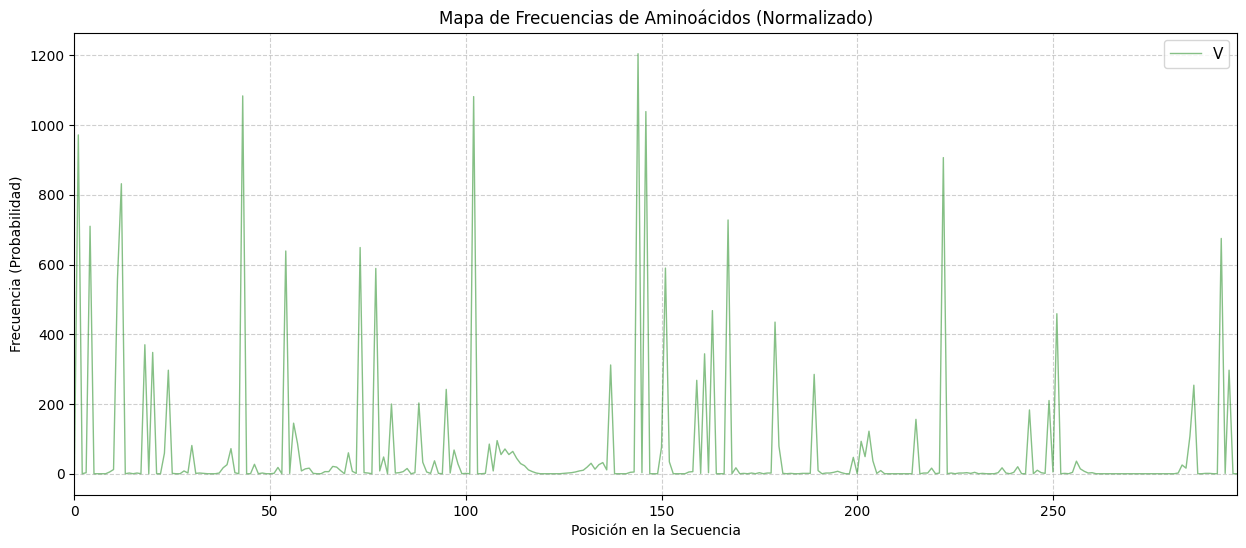

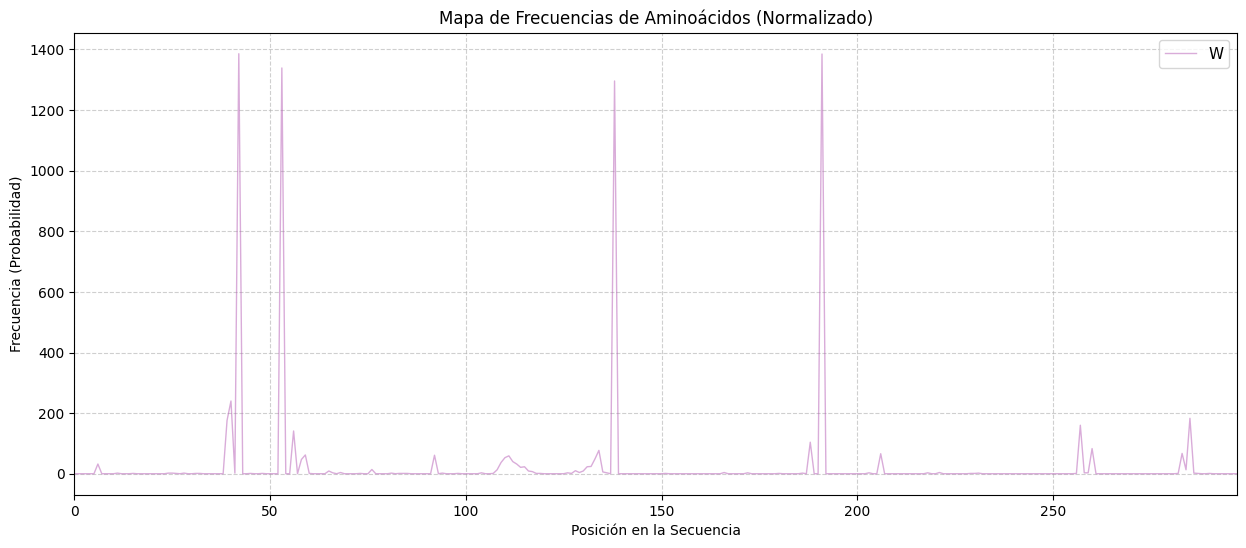

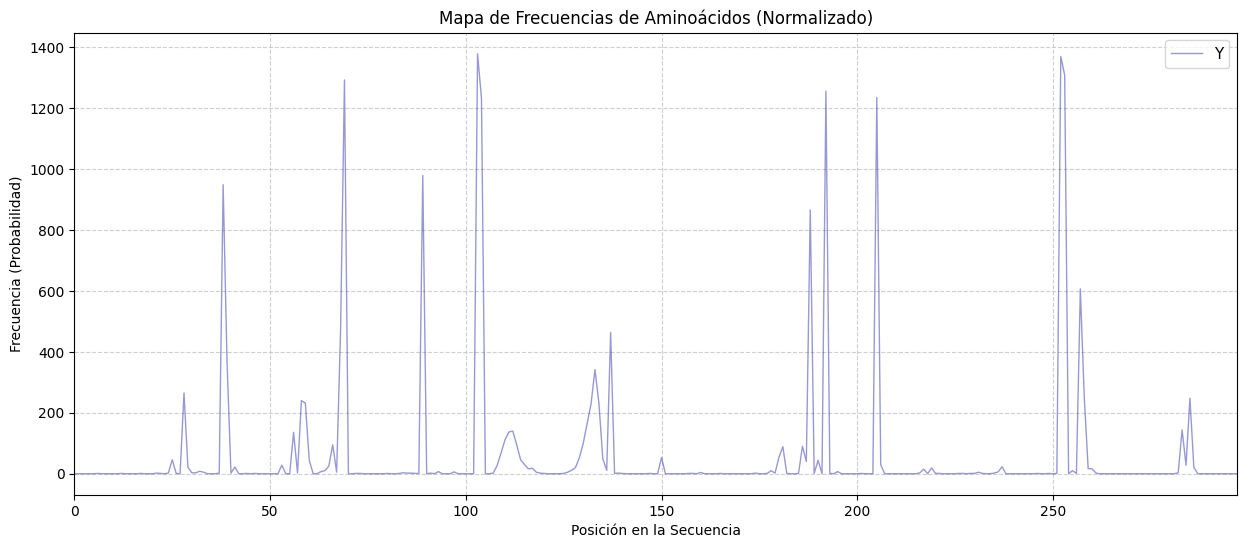

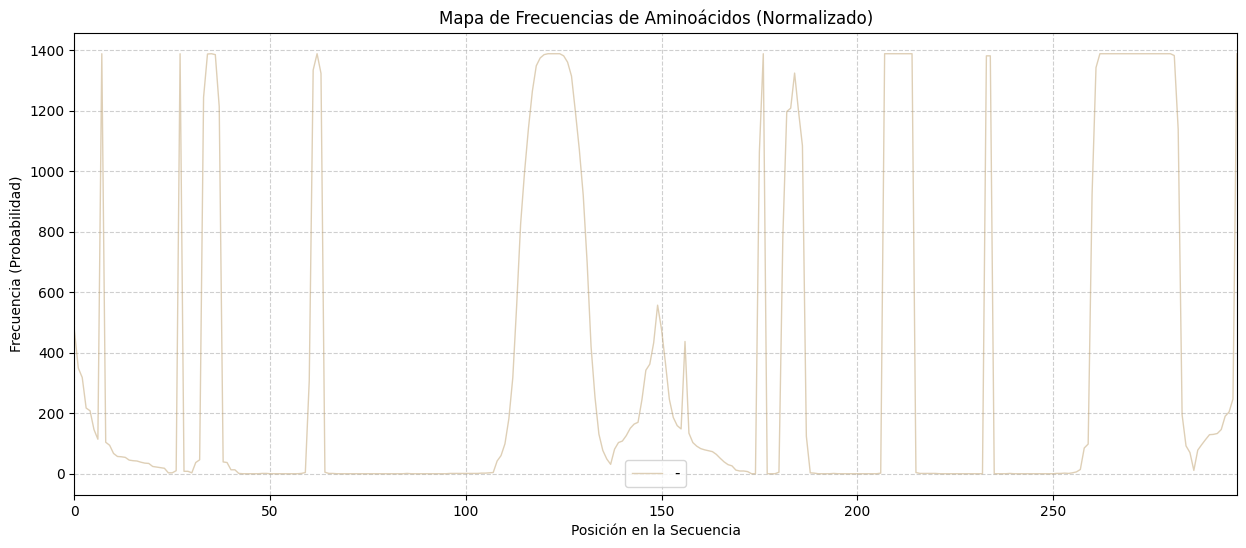

In [19]:
### AQUÍ ESTÁN LOS GRÁFICOS DE TODOS LOS AMINOÁCIDOS POR SEPARADO

x=range(len(frecuencias[0]))
for i, aa in enumerate(clave):
    y_valores = frecuencias[i, :]
    

    if aa == 'G' or aa == 'A':        #Como el G es un gris medio claro, haciendo esto nos aseguramos de que se vea más
        alpha_ = 1.0
        grosor_ = 2.0

    else:
        alpha_ = 0.5
        grosor_ = 1.0

    plt.figure(figsize=(15, 6))
    # linewidth=1.0 hace la línea fina y elegante
    # alpha=0.8 le da un toque de transparencia para ver si hay solapamientos
    plt.plot(x, y_valores, label=aa, linewidth=grosor_, alpha=alpha_, color = colores[i])

    plt.title('Mapa de Frecuencias de Aminoácidos (Normalizado)')
    plt.xlabel('Posición en la Secuencia')
    plt.ylabel('Frecuencia (Probabilidad)')
    plt.margins(x=0) # Quitamos márgenes blancos a los lados

    # Configuración final
    plt.legend(fontsize=11, loc='best') # 'best' busca el sitio donde menos estorbe
    plt.grid(True, linestyle='--', alpha=0.6)

    #plt.savefig('grafica_dispersion_sin_ajustar.pdf', bbox_inches='tight')
    plt.show()